In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from xgboost import XGBRegressor,plot_importance
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [3]:
data=pd.read_csv("House Price India.csv")

In [4]:
data.head()

,Date,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,grade of the house,...,Built Year,Renovation Year,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price
0,42491,5,2.50,3650,9050,2.0,0,4,5,10,...,1921,0,122003,52.8645,-114.557,2880,5400,2,58,2380000
1,42491,4,2.50,2920,4000,1.5,0,0,5,8,...,1909,0,122004,52.8878,-114.470,2470,4000,2,51,1400000
2,42491,5,2.75,2910,9480,1.5,0,0,3,8,...,1939,0,122004,52.8852,-114.468,2940,6600,1,53,1200000
3,42491,4,2.50,3310,42998,2.0,0,0,3,9,...,2001,0,122005,52.9532,-114.321,3350,42847,3,76,838000
4,42491,3,2.00,2710,4500,1.5,0,0,4,8,...,1929,0,122006,52.9047,-114.485,2060,4500,1,51,805000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14620 entries, 0 to 14619
Data columns (total 22 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Date                                   14620 non-null  int64  
 1   number of bedrooms                     14620 non-null  int64  
 2   number of bathrooms                    14620 non-null  float64
 3   living area                            14620 non-null  int64  
 4   lot area                               14620 non-null  int64  
 5   number of floors                       14620 non-null  float64
 6   waterfront present                     14620 non-null  int64  
 7   number of views                        14620 non-null  int64  
 8   condition of the house                 14620 non-null  int64  
 9   grade of the house                     14620 non-null  int64  
 10  Area of the house(excluding basement)  14620 non-null  int64  
 11  Ar

In [6]:
data.nunique()

Date                                      241
number of bedrooms                         12
number of bathrooms                        29
living area                               865
lot area                                 7451
number of floors                            6
waterfront present                          2
number of views                             5
condition of the house                      5
grade of the house                         10
Area of the house(excluding basement)     781
Area of the basement                      280
Built Year                                116
Renovation Year                            68
Postal Code                                70
Lattitude                                4662
Longitude                                 716
living_area_renov                         665
lot_area_renov                           6835
Number of schools nearby                    3
Distance from the airport                  31
Price                             

In [7]:
data.isnull().sum()

Date                                     0
number of bedrooms                       0
number of bathrooms                      0
living area                              0
lot area                                 0
number of floors                         0
waterfront present                       0
number of views                          0
condition of the house                   0
grade of the house                       0
Area of the house(excluding basement)    0
Area of the basement                     0
Built Year                               0
Renovation Year                          0
Postal Code                              0
Lattitude                                0
Longitude                                0
living_area_renov                        0
lot_area_renov                           0
Number of schools nearby                 0
Distance from the airport                0
Price                                    0
dtype: int64

In [8]:
data.isna().sum()

Date                                     0
number of bedrooms                       0
number of bathrooms                      0
living area                              0
lot area                                 0
number of floors                         0
waterfront present                       0
number of views                          0
condition of the house                   0
grade of the house                       0
Area of the house(excluding basement)    0
Area of the basement                     0
Built Year                               0
Renovation Year                          0
Postal Code                              0
Lattitude                                0
Longitude                                0
living_area_renov                        0
lot_area_renov                           0
Number of schools nearby                 0
Distance from the airport                0
Price                                    0
dtype: int64

In [9]:
postal_code_list=data['Postal Code'].unique()

In [10]:
postal_code_list

array([122003, 122004, 122005, 122006, 122007, 122008, 122009, 122010,
       122011, 122012, 122013, 122014, 122015, 122016, 122017, 122018,
       122019, 122020, 122021, 122022, 122023, 122024, 122025, 122026,
       122027, 122028, 122029, 122030, 122031, 122032, 122033, 122034,
       122035, 122036, 122037, 122038, 122039, 122040, 122041, 122042,
       122043, 122044, 122045, 122046, 122047, 122048, 122049, 122050,
       122051, 122052, 122053, 122054, 122055, 122056, 122057, 122058,
       122059, 122060, 122061, 122062, 122063, 122064, 122065, 122066,
       122067, 122068, 122069, 122070, 122071, 122072])

In [11]:
data["number of bathrooms"]=round(data["number of bathrooms"])

data["number of floors"]=round(data["number of floors"])

In [12]:
data["number of bathrooms"]=(data["number of bathrooms"].astype(int))
data["number of floors"]=(data["number of floors"].astype(int))

In [13]:
print("Lowest Price: ", min(data['Price'].values))

Lowest Price:  78000


In [14]:
print("Highest Price: ", max(data['Price'].values))

Highest Price:  7700000


In [15]:
data['House Age']=2024-data['Built Year']

In [16]:
data=data.rename(columns={'living_area_renov':'Provided Area'})

In [17]:
data.head(5)

,Date,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,grade of the house,...,Renovation Year,Postal Code,Lattitude,Longitude,Provided Area,lot_area_renov,Number of schools nearby,Distance from the airport,Price,House Age
0,42491,5,2,3650,9050,2,0,4,5,10,...,0,122003,52.8645,-114.557,2880,5400,2,58,2380000,103
1,42491,4,2,2920,4000,2,0,0,5,8,...,0,122004,52.8878,-114.470,2470,4000,2,51,1400000,115
2,42491,5,3,2910,9480,2,0,0,3,8,...,0,122004,52.8852,-114.468,2940,6600,1,53,1200000,85
3,42491,4,2,3310,42998,2,0,0,3,9,...,0,122005,52.9532,-114.321,3350,42847,3,76,838000,23
4,42491,3,2,2710,4500,2,0,0,4,8,...,0,122006,52.9047,-114.485,2060,4500,1,51,805000,95


In [18]:
data['waterfront present'] = data['waterfront present'].replace([0],'No')
data['waterfront present']= data['waterfront present'].replace([1],'Yes')

In [19]:
data['condition of the house']= data['condition of the house'].replace([1],'Meagre')
data['condition of the house']= data['condition of the house'].replace([2],'Moderately Degraded')
data['condition of the house']= data['condition of the house'].replace([3],'Fair')
data['condition of the house']= data['condition of the house'].replace([4],'Good State')
data['condition of the house']= data['condition of the house'].replace([5],'Excellent State')

In [20]:
numeric_data = data.select_dtypes(include=[np.number])
correlation = numeric_data.corrwith(data['Price'])


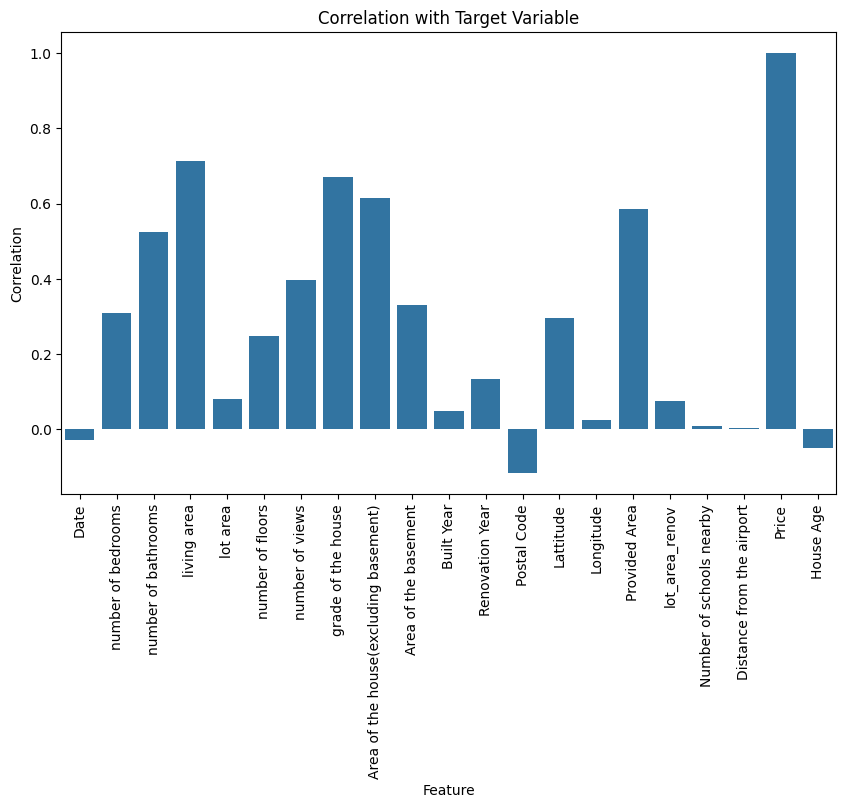

In [21]:
plt.figure(figsize=(10, 6))
sns.barplot(x=correlation.index, y=correlation.values)
plt.xticks(rotation=90)
plt.title("Correlation with Target Variable")
plt.xlabel("Feature")
plt.ylabel("Correlation")
plt.show()

In [22]:
data=data.drop(columns=['Date','Postal Code'],axis=1)

In [23]:
y=data['Price']
data=data.drop('Price', axis=1)

In [24]:
data.head(4)

,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,grade of the house,Area of the house(excluding basement),Area of the basement,Built Year,Renovation Year,Lattitude,Longitude,Provided Area,lot_area_renov,Number of schools nearby,Distance from the airport,House Age
0,5,2,3650,9050,2,No,4,Excellent State,10,3370,280,1921,0,52.8645,-114.557,2880,5400,2,58,103
1,4,2,2920,4000,2,No,0,Excellent State,8,1910,1010,1909,0,52.8878,-114.470,2470,4000,2,51,115
2,5,3,2910,9480,2,No,0,Fair,8,2910,0,1939,0,52.8852,-114.468,2940,6600,1,53,85
3,4,2,3310,42998,2,No,0,Fair,9,3310,0,2001,0,52.9532,-114.321,3350,42847,3,76,23


In [25]:
def piechart(column):
  condition_counts = column.value_counts()
  plt.pie(condition_counts, labels=condition_counts.index, autopct='%2.1f%%')
  plt.title("Ratio")
  plt.show()

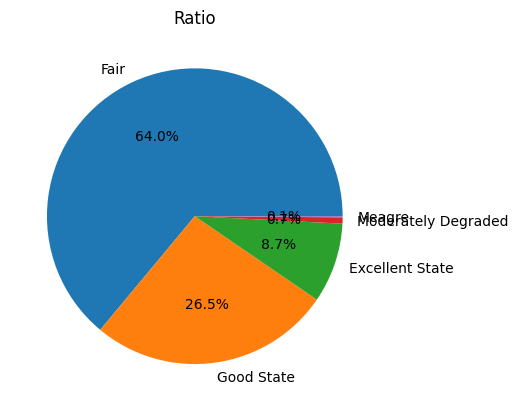

In [26]:
piechart(data['condition of the house'])

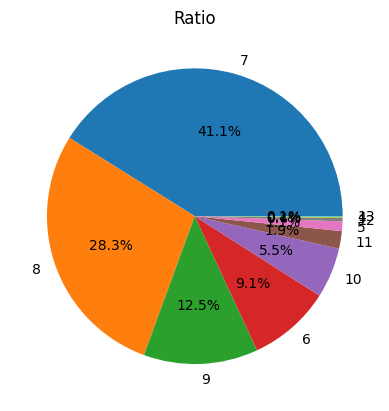

In [27]:
piechart(data['grade of the house'])

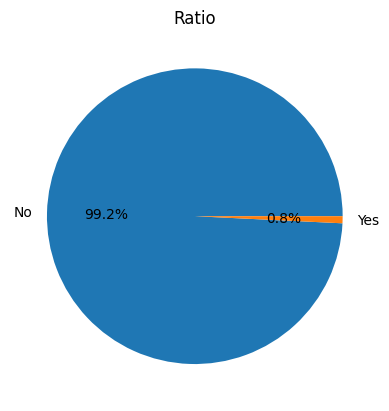

In [28]:
piechart(data['waterfront present'])

C:\Users\Dell\AppData\Local\Temp\ipykernel_19272\309396528.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[column], shade=True)


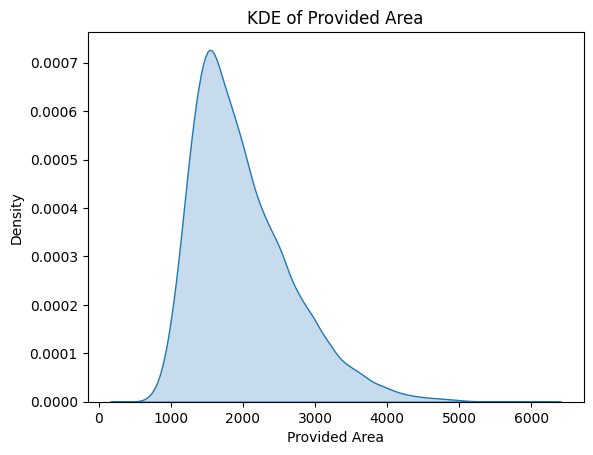

In [29]:

def kdeplts(data, column):
    sns.kdeplot(data[column], shade=True)
    plt.title(f"KDE of {column}")
    plt.xlabel(column)
    plt.ylabel("Density")
    plt.show()
kdeplts(data, 'Provided Area')


C:\Users\Dell\AppData\Local\Temp\ipykernel_19272\309396528.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[column], shade=True)


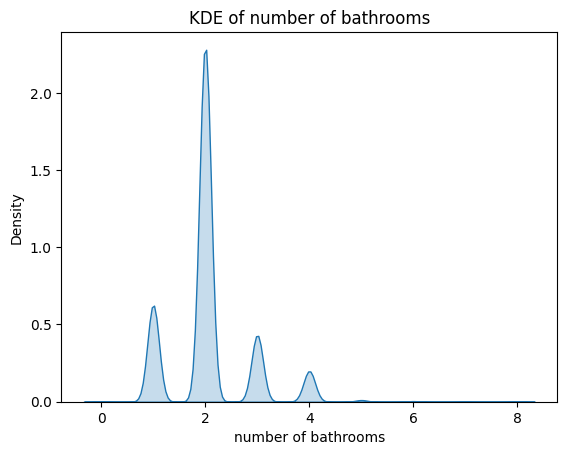

In [30]:
kdeplts(data, 'number of bathrooms')

C:\Users\Dell\AppData\Local\Temp\ipykernel_19272\309396528.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[column], shade=True)


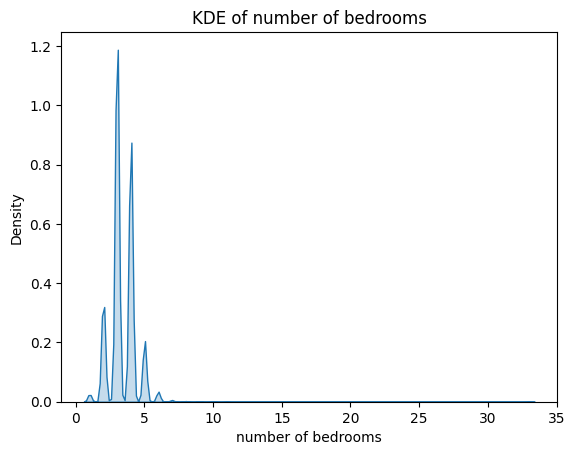

In [31]:
kdeplts(data, 'number of bedrooms')

C:\Users\Dell\AppData\Local\Temp\ipykernel_19272\309396528.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[column], shade=True)


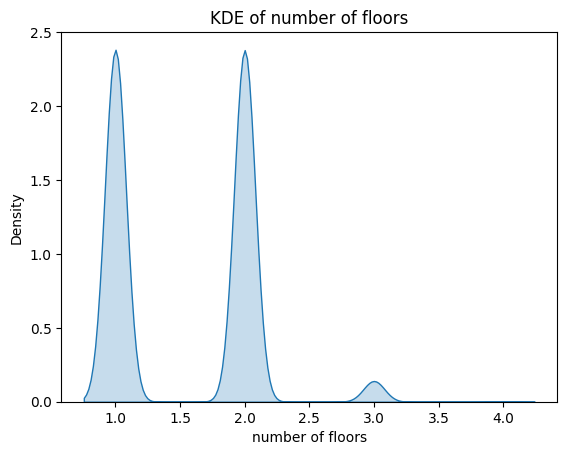

In [32]:
kdeplts(data, 'number of floors')

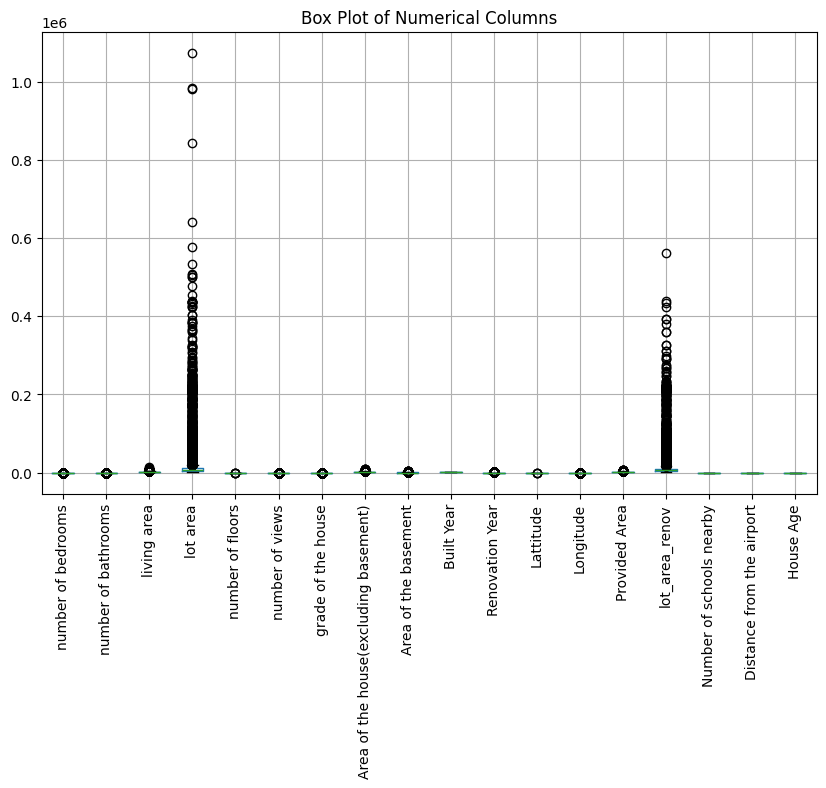

In [33]:
sample=data.select_dtypes(include=['int','float'])
plt.figure(figsize=(10, 6))
data[sample.columns].boxplot()
plt.xticks(rotation=90)
plt.title('Box Plot of Numerical Columns')
plt.show()

Text(0, 0.5, 'Values')

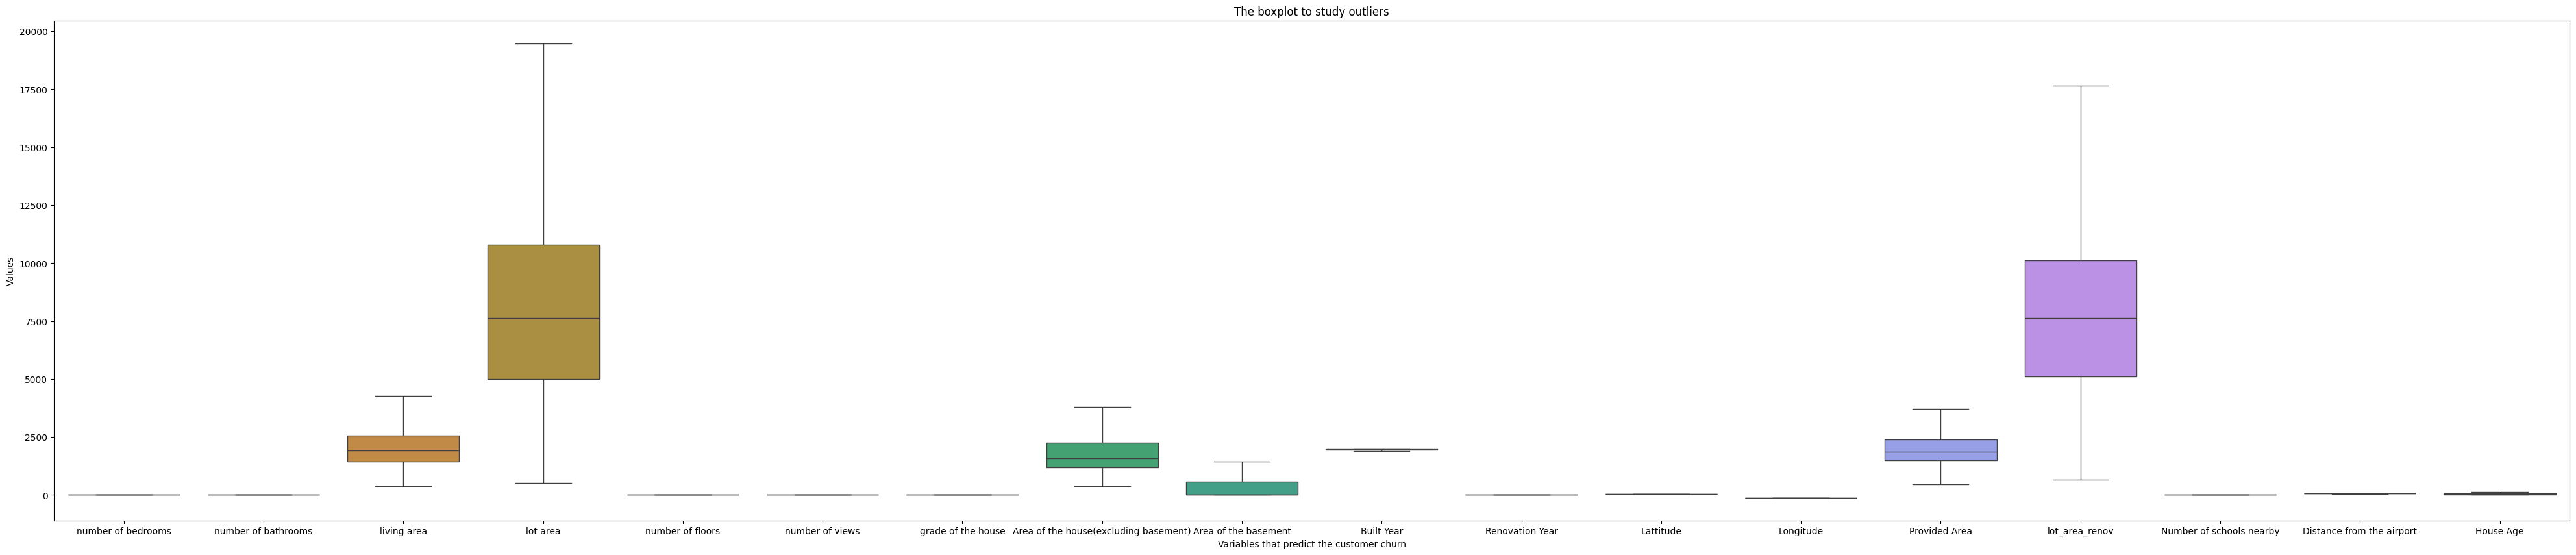

In [34]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    l= Q1-(1.5 * IQR)
    u= Q3+(1.5 * IQR)
    return l, u

for column in sample.columns:
    if data[column].dtype != 'object':
        l,u=remove_outlier(data[column])
        data[column]=np.where(data[column]>u,u,data[column])
        data[column]=np.where(data[column]<l,l,data[column])

plt.figure(figsize=(50,10))
sns.boxplot(data=data)
plt.title('The boxplot to study outliers')
plt.xlabel('Variables that predict the customer churn')
plt.ylabel('Values')

In [35]:
X_train,X_test,y_train,y_test=train_test_split(data,y,random_state=42)

In [36]:
cat_features=data.select_dtypes(include=['object']).columns.tolist()

In [37]:
num_features=data.select_dtypes(include=['int','float']).columns.tolist()

In [38]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_features),
        ('cat', OneHotEncoder(), cat_features)
    ]
)

In [39]:
pipeline1= Pipeline([
    ('preprocessor', preprocessor),
    ('regressor1', LinearRegression())
])

In [40]:
X_train.columns

Index(['number of bedrooms', 'number of bathrooms', 'living area', 'lot area',
       'number of floors', 'waterfront present', 'number of views',
       'condition of the house', 'grade of the house',
       'Area of the house(excluding basement)', 'Area of the basement',
       'Built Year', 'Renovation Year', 'Lattitude', 'Longitude',
       'Provided Area', 'lot_area_renov', 'Number of schools nearby',
       'Distance from the airport', 'House Age'],
      dtype='object')

In [41]:
print("Categorical features:", cat_features)
print("Numerical features:", num_features)


Categorical features: ['waterfront present', 'condition of the house']
Numerical features: ['number of bedrooms', 'number of bathrooms', 'living area', 'lot area', 'number of floors', 'number of views', 'grade of the house', 'Area of the house(excluding basement)', 'Area of the basement', 'Built Year', 'Renovation Year', 'Lattitude', 'Longitude', 'Provided Area', 'lot_area_renov', 'Number of schools nearby', 'Distance from the airport', 'House Age']


In [42]:
pipeline1.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['number of bedrooms',
                                                   'number of bathrooms',
                                                   'living area', 'lot area',
                                                   'number of floors',
                                                   'number of views',
                                                   'grade of the house',
                                                   'Area of the '
                                                   'house(excluding basement)',
                                                   'Area of the basement',
                                                   'Built Year',
                                                   'Renovation Year',
                                                   'Lattitude', 'Longitude',
                                                   'Provided Area',
                                                   'lot_area_renov',
                                                   'Number of schools nearby',
                                                   'Distance from the airport',
                                                   'House Age']),
                                                 ('cat', OneHotEncoder(),
                                                  ['waterfront present',
                                                   'condition of the '
                                                   'house'])])),
                ('regressor1', LinearRegression())])

In [43]:
y_pred = pipeline1.predict(X_test)

In [44]:
y_pred

array([334247.77751237, 680213.39019832, 490463.6769547 , ...,
       989963.54773517, 749789.00916633, 336604.60293343])

In [45]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred = pipeline1.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)


print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R^2 Score:", r2)


Mean Absolute Error (MAE): 132705.28094577577
Mean Squared Error (MSE): 51045593907.892975
Root Mean Squared Error (RMSE): 225932.71987008207
R^2 Score: 0.6375421889044048


c:\Users\Dell\Downloads\HousingPricePrediction\virtualenv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [46]:

pipeline2=Pipeline([('preprocessor',preprocessor),
                    ('regressor2', XGBRegressor(objective='reg:squarederror', random_state=42))])
pipeline2.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['number of bedrooms',
                                                   'number of bathrooms',
                                                   'living area', 'lot area',
                                                   'number of floors',
                                                   'number of views',
                                                   'grade of the house',
                                                   'Area of the '
                                                   'house(excluding basement)',
                                                   'Area of the basement',
                                                   'Built Year',
                                                   'Renovation Year',
                                                   'Lattitude', 'Longitude',
                                                   'Provided Area',
                                                   'lot_area_renov',
                                                   'Numb...
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=None, n_jobs=None,
                              num_parallel_tree=None, random_state=42, ...))])

In [47]:
y_pred=pipeline2.predict(X_test)

In [48]:
y_pred

array([281429.75, 705274.06, 569428.5 , ..., 552348.2 , 661819.5 ,
       290836.47], dtype=float32)

In [49]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)


print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R^2 Score:", r2)

Mean Absolute Error (MAE): 71689.82772956566
Mean Squared Error (MSE): 18992879831.994213
Root Mean Squared Error (RMSE): 137814.65753683174
R^2 Score: 0.8651378750801086


c:\Users\Dell\Downloads\HousingPricePrediction\virtualenv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


                                            Feature  Importance
6                           num__grade of the house    0.423534
18                       cat__waterfront present_No    0.290869
2                                  num__living area    0.078495
11                                   num__Lattitude    0.051823
12                                   num__Longitude    0.028205
13                               num__Provided Area    0.020053
21                 cat__condition of the house_Fair    0.013485
9                                   num__Built Year    0.013435
7        num__Area of the house(excluding basement)    0.011817
0                           num__number of bedrooms    0.011633
20      cat__condition of the house_Excellent State    0.009907
14                              num__lot_area_renov    0.007405
3                                     num__lot area    0.007063
4                             num__number of floors    0.006687
23               cat__condition of the h

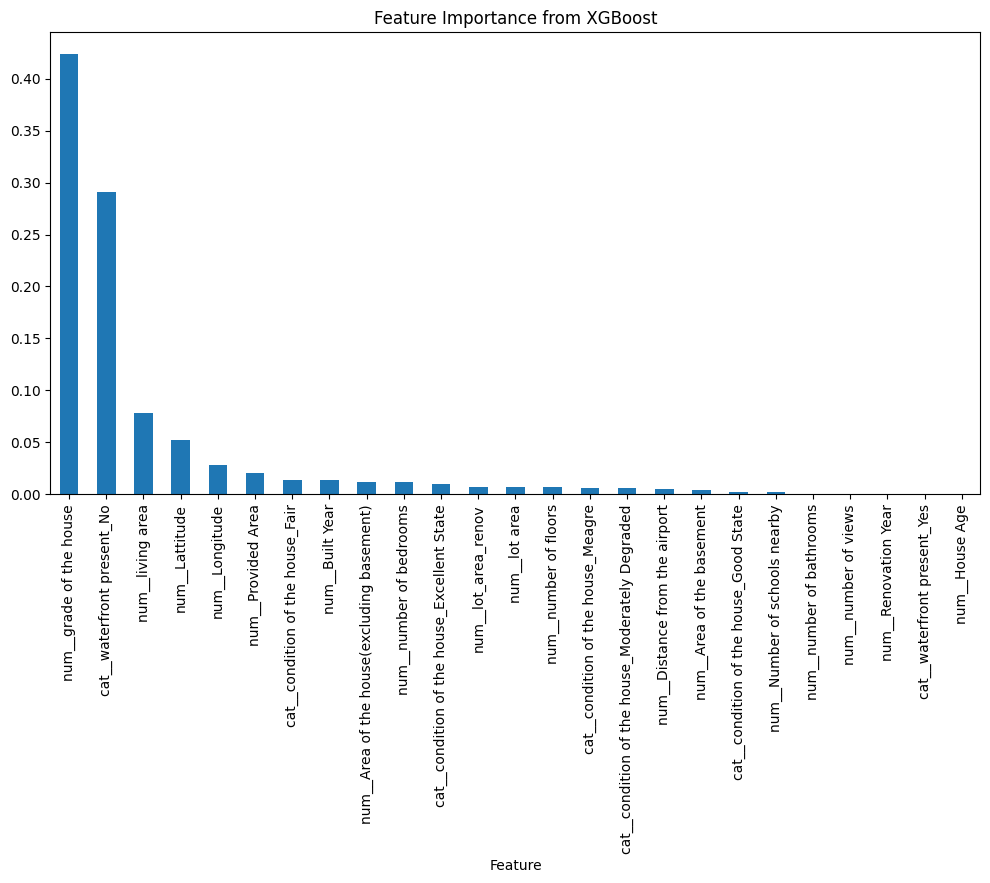

In [50]:

model = pipeline2.named_steps['regressor2']
feature_importances = model.feature_importances_
preprocessor = pipeline2.named_steps['preprocessor']

# Get transformed feature names (e.g., if you used a ColumnTransformer)
feature_names = preprocessor.get_feature_names_out()

# Combine into a DataFrame for display
importances_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importances_df = importances_df.sort_values(by='Importance', ascending=False)

print(importances_df)

# Plot the feature importances
import matplotlib.pyplot as plt
importances_df.plot(kind='bar', x='Feature', y='Importance', figsize=(12, 6), legend=False)
plt.title('Feature Importance from XGBoost')
plt.show()


In [51]:
import pickle
with open('xgbregressor_model.pkl', 'wb') as file:
  pickle.dump(pipeline2,file)


In [52]:
with open('xgbregressor_model.pkl','rb') as file:
  loaded_pipeline=pickle.load(file)

In [53]:
y_predfinal=loaded_pipeline.predict(X_test)

In [54]:
y_predfinal

array([281429.75, 705274.06, 569428.5 , ..., 552348.2 , 661819.5 ,
       290836.47], dtype=float32)